# Aprendizado de Máquina - OrlFaces20
- Alef Segura Santos, 9762942
- Gustavo de Moura Souza, 9762981

### Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow
from skimage.feature import hog

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

____
## Parte 1 - Pré-processamento

### Data Input

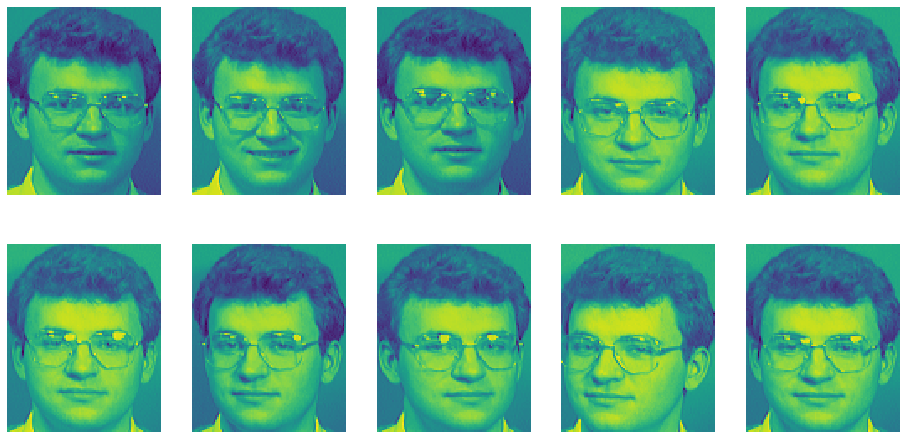

In [2]:
images = []
labels = []

for i in range(1,21):
    for j in range(1,11):
        images.append(imread('s' + str(i) + str(j) + '.png'))
        labels += [str(i)]

plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.grid(False)
    plt.imshow(images[i+50])
    plt.gca().set_frame_on(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().get_xaxis().set_visible(False)
plt.show()

### Histogram of Oriented Gradients

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


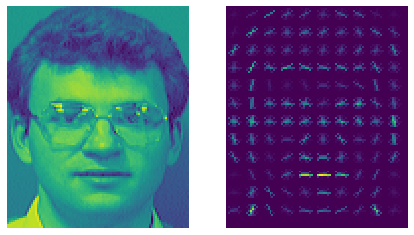

In [3]:
images_hog = []
for img in images:
    images_hog.append(hog(img, visualize=True, pixels_per_cell=(9,9)))
    
    
fig = plt.figure(figsize=(15,5))

fig.add_subplot(141)
plt.grid(False)
plt.imshow(images[52])
plt.gca().set_frame_on(False)
plt.gca().get_yaxis().set_visible(False)
plt.gca().get_xaxis().set_visible(False)
    
fig.add_subplot(142)
plt.grid(False)
plt.imshow(images_hog[52][1])
plt.gca().set_frame_on(False)
plt.gca().get_yaxis().set_visible(False)
plt.gca().get_xaxis().set_visible(False)

___
## Parte 2 - Classificadores

In [0]:
# X/y
X = [img[0] for img in images_hog]
y = labels

# KFold
kf = StratifiedKFold(10)

### Hyperparameters Search

#### KNN

In [5]:
scores_knn = []
K = [3, 5, 7, 9, 13]
for k in K:
    knn = KNeighborsClassifier(k)
    cv = cross_validate(knn, X, y, cv=kf, return_train_score=True, verbose=1, n_jobs=-1)
    score = {'K' : k,
             'Test Scores' : cv['test_score'],
             'Test Mean' : np.mean(cv['test_score']),
             'Train Scores' :cv['train_score'],
             'Train Mean' : np.mean(cv['train_score'])}
    print(score)
    scores_knn.append(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 3, 'Test Scores': array([1.  , 1.  , 1.  , 0.95, 0.9 , 0.95, 0.9 , 0.85, 0.8 , 0.8 ]), 'Test Mean': 0.9150000000000003, 'Train Scores': array([0.97222222, 0.96666667, 0.97222222, 0.97222222, 0.96111111,
       0.96666667, 0.97777778, 0.97777778, 0.96666667, 0.98888889]), 'Train Mean': 0.9722222222222221}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 5, 'Test Scores': array([1.  , 0.9 , 0.95, 1.  , 0.85, 0.85, 0.9 , 0.85, 0.8 , 0.8 ]), 'Test Mean': 0.89, 'Train Scores': array([0.93333333, 0.92777778, 0.93333333, 0.93333333, 0.94444444,
       0.93888889, 0.93888889, 0.93888889, 0.96666667, 0.96111111]), 'Train Mean': 0.9416666666666667}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 7, 'Test Scores': array([0.8 , 0.9 , 0.95, 0.95, 0.85, 0.85, 0.9 , 0.85, 0.75, 0.8 ]), 'Test Mean': 0.8600000000000001, 'Train Scores': array([0.92222222, 0.9       , 0.9       , 0.92222222, 0.91111111,
       0.92222222, 0.91666667, 0.91111111, 0.93888889, 0.93888889]), 'Train Mean': 0.9183333333333333}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'K': 9, 'Test Scores': array([0.8 , 0.9 , 0.9 , 0.85, 0.75, 0.85, 0.85, 0.8 , 0.8 , 0.8 ]), 'Test Mean': 0.8300000000000001, 'Train Scores': array([0.87777778, 0.86111111, 0.87777778, 0.9       , 0.89444444,
       0.88888889, 0.90555556, 0.88888889, 0.89444444, 0.89444444]), 'Train Mean': 0.8883333333333333}
{'K': 13, 'Test Scores': array([0.75, 0.8 , 0.9 , 0.75, 0.75, 0.7 , 0.75, 0.75, 0.8 , 0.7 ]), 'Test Mean': 0.765, 'Train Scores': array([0.83333333, 0.80555556, 0.82222222, 0.83333333, 0.83333333,
       0.81666667, 0.82777778, 0.82777778, 0.81111111, 0.83888889]), 'Train Mean': 0.825}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.7s finished


In [6]:
df_knn = pd.DataFrame(scores_knn).set_index('K')
df_knn

,Test Mean,Test Scores,Train Mean,Train Scores
K,,,,
3,0.915,"[1.0, 1.0, 1.0, 0.95, 0.9, 0.95, 0.9, 0.85, 0....",0.972222,"[0.9722222222222222, 0.9666666666666667, 0.972..."
5,0.890,"[1.0, 0.9, 0.95, 1.0, 0.85, 0.85, 0.9, 0.85, 0...",0.941667,"[0.9333333333333333, 0.9277777777777778, 0.933..."
7,0.860,"[0.8, 0.9, 0.95, 0.95, 0.85, 0.85, 0.9, 0.85, ...",0.918333,"[0.9222222222222223, 0.9, 0.9, 0.9222222222222..."
9,0.830,"[0.8, 0.9, 0.9, 0.85, 0.75, 0.85, 0.85, 0.8, 0...",0.888333,"[0.8777777777777778, 0.8611111111111112, 0.877..."
13,0.765,"[0.75, 0.8, 0.9, 0.75, 0.75, 0.7, 0.75, 0.75, ...",0.825000,"[0.8333333333333334, 0.8055555555555556, 0.822..."


#### MLP

In [7]:
scores_mlp = []
layers = [(15,), (20,), (10,5), (12,8)]
alphas = [0.9, 0.5, 0.1]
momentums = [0.9, 0.7]
for layer in layers:
    for alpha in alphas:
        for momentum in momentums:
            mlp = MLPClassifier(hidden_layer_sizes=layer, alpha=alpha, momentum=momentum, max_iter=1500)
            cv = cross_validate(mlp, X, y, cv=kf, return_train_score=True, verbose=2, n_jobs=-1)
            score = {'Layers' : layer,
                     'Alpha' : alpha,
                     'Momentum' : momentum,
                     'Test Score' : cv['test_score'],
                     'Test Mean' : np.mean(cv['test_score']),
                     'Train Score' : cv['train_score'],
                     'Train Mean' : np.mean(cv['train_score'])}
            print(score)
            scores_mlp.append(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (15,), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([0.95, 1.  , 0.95, 1.  , 0.95, 1.  , 0.95, 0.9 , 0.85, 0.8 ]), 'Test Mean': 0.9349999999999999, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (15,), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([1.  , 1.  , 1.  , 1.  , 0.9 , 1.  , 0.95, 0.95, 0.85, 0.9 ]), 'Test Mean': 0.9550000000000001, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (15,), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([0.95, 1.  , 1.  , 1.  , 0.9 , 1.  , 0.95, 0.95, 0.85, 0.95]), 'Test Mean': 0.9549999999999998, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (15,), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([0.95, 1.  , 1.  , 1.  , 1.  , 0.95, 0.95, 0.95, 0.85, 0.85]), 'Test Mean': 0.95, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (15,), 'Alpha': 0.1, 'Momentum': 0.9, 'Test Score': array([1.  , 1.  , 0.95, 1.  , 0.9 , 0.95, 0.95, 0.95, 0.9 , 0.9 ]), 'Test Mean': 0.95, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (15,), 'Alpha': 0.1, 'Momentum': 0.7, 'Test Score': array([1.  , 1.  , 0.95, 1.  , 0.95, 1.  , 1.  , 0.95, 0.85, 0.85]), 'Test Mean': 0.9549999999999998, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (20,), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([0.95, 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 0.95, 0.85, 0.9 ]), 'Test Mean': 0.96, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (20,), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([0.95, 1.  , 1.  , 1.  , 1.  , 0.95, 0.95, 0.95, 0.85, 0.95]), 'Test Mean': 0.96, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (20,), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 0.95, 0.9 , 0.9 ]), 'Test Mean': 0.9700000000000001, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (20,), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([0.95, 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 0.95, 0.9 , 0.95]), 'Test Mean': 0.97, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (20,), 'Alpha': 0.1, 'Momentum': 0.9, 'Test Score': array([0.95, 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 0.95, 0.9 , 0.95]), 'Test Mean': 0.97, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (20,), 'Alpha': 0.1, 'Momentum': 0.7, 'Test Score': array([0.95, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 0.9 , 0.9 ]), 'Test Mean': 0.9700000000000001, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (10, 5), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([0.85, 0.9 , 0.95, 1.  , 0.9 , 0.9 , 0.95, 0.85, 0.7 , 0.65]), 'Test Mean': 0.865, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (10, 5), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([0.9 , 0.95, 0.9 , 1.  , 1.  , 0.85, 1.  , 0.7 , 0.55, 0.8 ]), 'Test Mean': 0.865, 'Train Score': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.94444444, 1.        ]), 'Train Mean': 0.9944444444444445}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (10, 5), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([0.85, 0.5 , 0.95, 1.  , 0.85, 0.75, 0.5 , 0.75, 0.75, 0.7 ]), 'Test Mean': 0.76, 'Train Score': array([1.        , 0.62777778, 1.        , 1.        , 1.        ,
       0.98333333, 0.71111111, 1.        , 1.        , 1.        ]), 'Train Mean': 0.9322222222222223}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (10, 5), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([0.9 , 0.95, 1.  , 0.95, 0.85, 0.85, 1.  , 0.9 , 0.8 , 0.15]), 'Test Mean': 0.835, 'Train Score': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.62222222]), 'Train Mean': 0.9622222222222222}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (10, 5), 'Alpha': 0.1, 'Momentum': 0.9, 'Test Score': array([0.9 , 0.95, 0.85, 0.95, 0.65, 0.75, 0.9 , 0.9 , 0.8 , 0.75]), 'Test Mean': 0.8399999999999999, 'Train Score': array([1.  , 1.  , 1.  , 1.  , 0.85, 1.  , 1.  , 1.  , 1.  , 1.  ]), 'Train Mean': 0.985}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (10, 5), 'Alpha': 0.1, 'Momentum': 0.7, 'Test Score': array([0.95, 0.9 , 0.85, 1.  , 1.  , 0.9 , 0.95, 0.95, 0.65, 0.85]), 'Test Mean': 0.9, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (12, 8), 'Alpha': 0.9, 'Momentum': 0.9, 'Test Score': array([0.9 , 0.95, 1.  , 1.  , 0.95, 0.95, 0.95, 0.95, 0.8 , 0.8 ]), 'Test Mean': 0.9250000000000002, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (12, 8), 'Alpha': 0.9, 'Momentum': 0.7, 'Test Score': array([0.95, 1.  , 1.  , 1.  , 0.95, 0.95, 1.  , 0.95, 0.85, 0.85]), 'Test Mean': 0.95, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (12, 8), 'Alpha': 0.5, 'Momentum': 0.9, 'Test Score': array([1.  , 0.95, 0.95, 1.  , 0.95, 0.95, 1.  , 0.95, 0.8 , 0.75]), 'Test Mean': 0.93, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (12, 8), 'Alpha': 0.5, 'Momentum': 0.7, 'Test Score': array([0.95, 1.  , 0.95, 1.  , 0.9 , 0.95, 1.  , 0.9 , 0.85, 0.85]), 'Test Mean': 0.9349999999999999, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'Layers': (12, 8), 'Alpha': 0.1, 'Momentum': 0.9, 'Test Score': array([1.  , 0.9 , 1.  , 1.  , 0.9 , 0.9 , 0.95, 0.95, 0.85, 0.85]), 'Test Mean': 0.9299999999999999, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}
{'Layers': (12, 8), 'Alpha': 0.1, 'Momentum': 0.7, 'Test Score': array([0.95, 0.95, 1.  , 1.  , 0.9 , 0.95, 0.95, 0.95, 0.9 , 0.9 ]), 'Test Mean': 0.9450000000000001, 'Train Score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Train Mean': 1.0}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min finished


In [8]:
df_mlp = pd.DataFrame(scores_mlp).set_index(['Layers','Alpha','Momentum'])
df_mlp

Test Mean  ...                                        Train Score
Layers  Alpha Momentum             ...                                                   
(15,)   0.9   0.9           0.935  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.955  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.5   0.9           0.955  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.950  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.1   0.9           0.950  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.955  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
(20,)   0.9   0.9           0.960  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.960  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.5   0.9           0.970  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.970  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.1   0.9           0.970  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.970  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
(10, 5) 0.9   0.9           0.865  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.865  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.944...
        0.5   0.9           0.760  ...  [1.0, 0.6277777777777778, 1.0, 1.0, 1.0, 0.983...
              0.7           0.835  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.1   0.9           0.840  ...  [1.0, 1.0, 1.0, 1.0, 0.85, 1.0, 1.0, 1.0, 1.0,...
              0.7           0.900  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
(12, 8) 0.9   0.9           0.925  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.950  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.5   0.9           0.930  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.935  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
        0.1   0.9           0.930  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
              0.7           0.945  ...  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...

[24 rows x 4 columns]

### Modelos Escolhidos

In [0]:
knn = KNeighborsClassifier(3)
mlp = MLPClassifier(hidden_layer_sizes=(20), alpha=0.5, momentum=0.7, max_iter=1500)

#### Treinamento sem PCA

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,shuffle=True)

# KNN
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
prec_knn = precision_score(y_test, y_pred, average='micro')
acc_knn = accuracy_score(y_test, y_pred)

# MLP
mlp.fit(X_test, y_test)
y_pred = mlp.predict(X_test)
cm_mlp = confusion_matrix(y_test, y_pred)
prec_mlp = precision_score(y_test, y_pred, average='micro')
acc_mlp = accuracy_score(y_test, y_pred)

#### Treinamento com PCA

In [12]:
# PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

i = 0
summ = pca.explained_variance_ratio_[i]
while(summ < 0.5):
    i +=1
    summ += pca.explained_variance_ratio_[i]    

print(i, 'componentes, variância: %.2f' % summ, '%')

14 componentes, variância: 0.50 %


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:i],y,random_state=0,shuffle=True)

# KNN
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
cm_knn_pca = confusion_matrix(y_test, y_pred)
prec_knn_pca = precision_score(y_test, y_pred, average='micro')
acc_knn_pca = accuracy_score(y_test, y_pred)

# MLP
mlp.fit(X_test, y_test)
y_pred = mlp.predict(X_test)
cm_mlp_pca = confusion_matrix(y_test, y_pred)
prec_mlp_pca = precision_score(y_test, y_pred, average='micro')
acc_mlp_pca = accuracy_score(y_test, y_pred)

___
## Parte 3 - Resultados

### Sem PCA

In [27]:
print('Matriz de confusão:\n',cm_mlp)
print('Precisão:\n',prec_mlp)
print('Acurácia:\n',acc_mlp)


Matriz de confusão:
 [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Precisão:
 1.0
Acurácia:
 1.0


### Com PCA

In [28]:
print('Matriz de confusão:\n',cm_mlp_pca)
print('Precisão:\n',prec_mlp_pca)
print('Acurácia:\n',acc_mlp_pca)

Matriz de confusão:
 [[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Precisão:
 0.98
Acurácia:
 0.98
